# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Clustering and dimension-reduction
### VIDEO: PCA
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

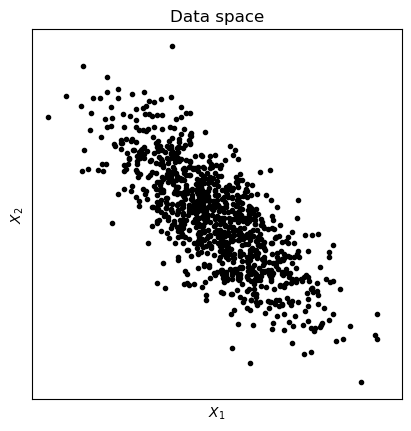

In [2]:
## Create the data

N = 1000 # 1000 data points

# data - first created as 2d data
xcoords = np.random.randn(N) # normally distributed random nums - have a variance of 1
ycoords = .4*np.random.randn(N) # std deviation scaled by .4
# the x and y values make a disc that is wide on the x axis and narrow on the y axis
x = np.array([ xcoords, ycoords ]).T

# orthogonal rotation matrix
th = np.pi/4
R1 = [ [np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)] ] # comes from trigonometry

# rotate data by pi divided by 4 - creates a correlated dataset shown in the plot
y = x@np.array(R1) # @ is matrix multiplication operator

axlim = [-1.1*max(abs(y.flatten())), 1.1*max(abs(y.flatten()))] # axis limits

# and plot
plt.plot(y[:,0],y[:,1],'k.')
plt.xticks([])
plt.yticks([])
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.axis('square')
plt.title('Data space')
plt.show()

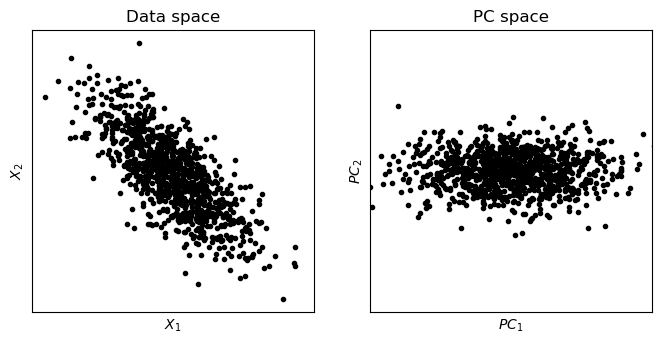

In [7]:
## now for PCA

# PCA using scikitlearn's function
pca = PCA().fit(y)

# get the PC scores
# apply the transformation of the principle components analysis to the data to get pc scores
# The pc scores are the data transformed into the PC space
pcscores = pca.transform(y)

# at this point the data is rotated so that the PC1 axis (seen as x axis in the plot) contains most of the variance in the signal
# PC2 has the second most amount of variance and is orthogonal to PC1


# and plot
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(y[:,0],y[:,1],'k.')
ax[0].axis('square') # sets aspect ratio to be equal or 1:1 - the x and y axes will have the same scale (removing this makes the height larger and the plot more rectangular)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xlim(axlim)
ax[1].set_ylim(axlim)
ax[0].set_xlabel('$X_1$')
ax[0].set_ylabel('$X_2$')
ax[0].set_title('Data space')

ax[1].plot(pcscores[:,0],pcscores[:,1],'k.')
ax[1].axis('square')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlim(axlim)
ax[1].set_ylim(axlim)
ax[1].set_xlabel('$PC_1$')
ax[1].set_ylabel('$PC_2$')
ax[1].set_title('PC space')

plt.show()

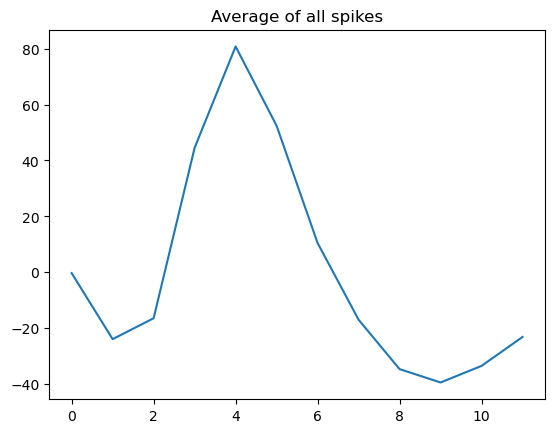

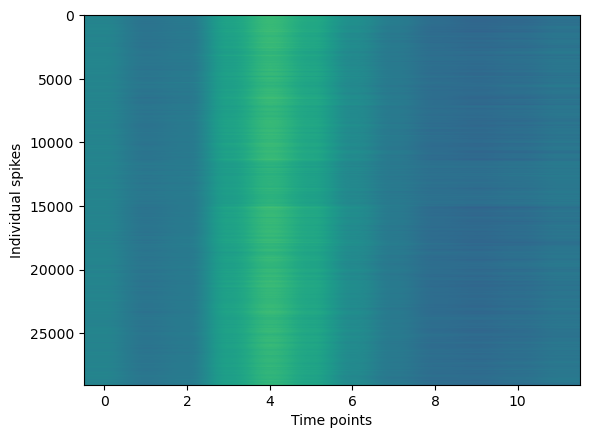

In [8]:
## using PCA for dimension reduction

# setting up data which has spike events in neurons in the brain
# the data is around 29000 events with 12 features (shown as time points on y axis)
# spikes are jolts from neuron interactions in the brain - term is action potentials
spikes = np.loadtxt('spikes.csv',delimiter=',')

# the top plot shows a time course with the average of all the events (energy, y-axis) per time point (x-axis)
plt.plot(np.mean(spikes,axis=0))
plt.title('Average of all spikes')
plt.show()

# each row shown in the bottom plot is a separate event
plt.imshow(spikes,aspect='auto')
plt.xlabel('Time points')
plt.ylabel('Individual spikes')
plt.show()

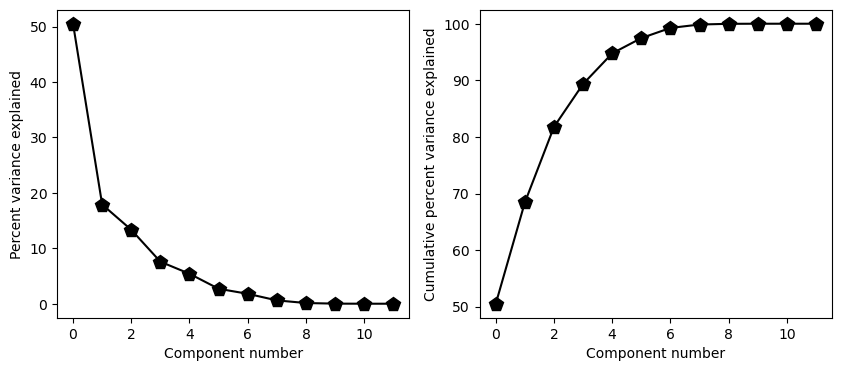

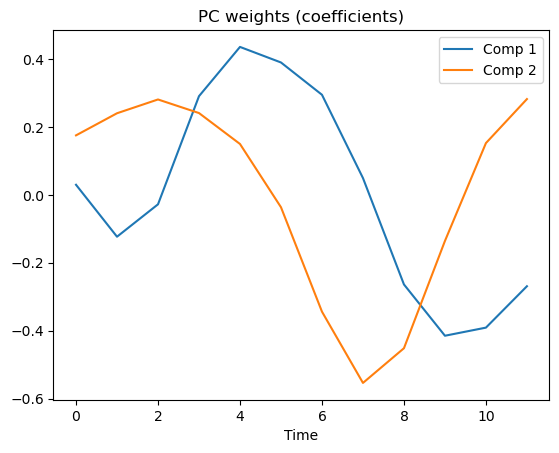

In [9]:
## using PCA to analyze the data and reduce dimensions

# PCA using scikitlearn's function
pca = PCA().fit(spikes) # 12 features and 29k events

# get the PC scores and the eigenspectrum
pcscores = pca.transform(spikes)
# eigen spectra
explVar = pca.explained_variance_
explVar = 100*explVar/sum(explVar) # convert the eigen spectrum to %total
coeffs  = pca.components_


# show the scree plot (a.k.a. eigenspectrum)
fig,ax = plt.subplots(1,2,figsize=(10,4))

# this plot is normalized to show percent variance explained - PC1 accounts for about 50% variance in the signal, PC2 for 18%
ax[0].plot(explVar,'kp-',markerfacecolor='k',markersize=10)
ax[0].set_xlabel('Component number')
ax[0].set_ylabel('Percent variance explained')


# cumulative sum of the percent variance above. as you add more PC axes, more of variance is accounted for - but note how the later Principle Components add very little to explanation (the first two do a lot)
ax[1].plot(np.cumsum(explVar),'kp-',markerfacecolor='k',markersize=10)
ax[1].set_xlabel('Component number')
ax[1].set_ylabel('Cumulative percent variance explained')
plt.show()

# now show the PC weights for the top two components
# the point of all of this was to make a 12 dimensional space (12 features in the data) easier to reason about by reducing it to 2 dimensions
plt.plot(coeffs[0,:])
plt.plot(coeffs[1,:])
plt.xlabel('Time')
plt.legend(('Comp 1','Comp 2'))
plt.title('PC weights (coefficients)')
plt.show()

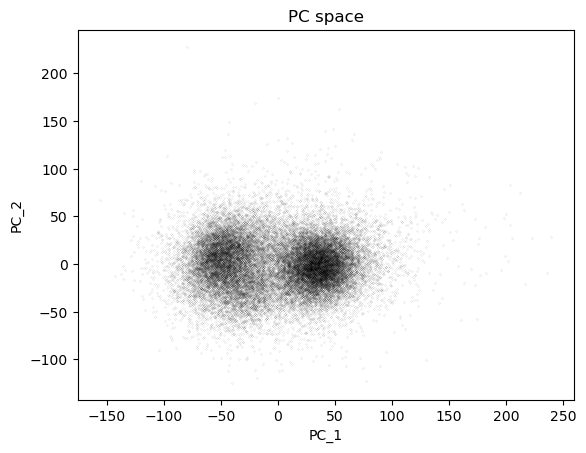

In [10]:
## show the PC scores

# This is how the 12 dimensional data looks like compressed into 2 dimensional space
# here we can see two big clusters  
  # this tells us that there were two separate neurons recorded by an electrode wire (the data reduces to 2 main categories)
  # each of the dots correspond to a row/event - some of the events above then correspond to neuron 1 and others to neuron 2
plt.plot(pcscores[:,0],pcscores[:,1],'k.',markersize=.1)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title('PC space')
plt.show()


# At this point you could apply K-means clustering to get labels assigned for the points. (i.e. neuron 1 and neuron 2)

c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


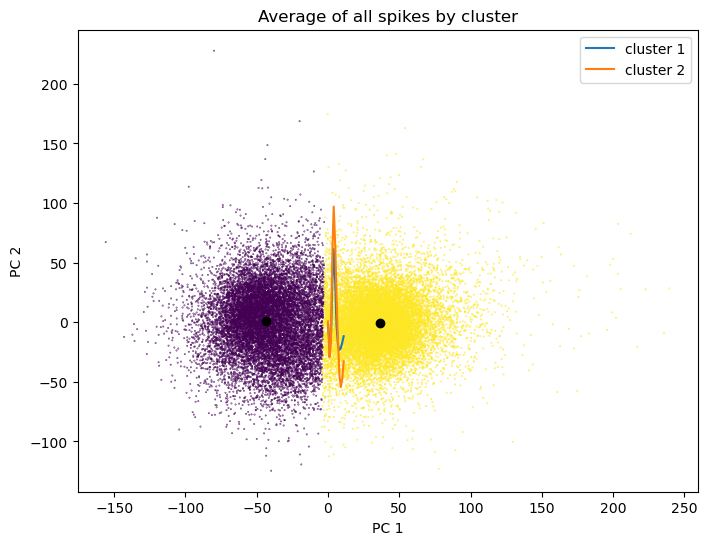

In [11]:
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=k)
data = np.transpose([pcscores[:,0], pcscores[:,1]])
kmeans = kmeans.fit(data)
cents = kmeans.cluster_centers_
 
# Plotting
y_pred = kmeans.fit_predict(data)
plt.rcParams["figure.figsize"] = (8,6)
plt.scatter(data[:, 0], data[:, 1], c=y_pred, s=.1)
plt.plot(cents[:,0],cents[:,1],'ko')
plt.title("K-means on PC data")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
 
plt.plot(spikes[y_pred==0].mean(axis=0), label='cluster 1')
plt.plot(spikes[y_pred==1].mean(axis=0), label='cluster 2')
plt.title('Average of all spikes by cluster')
plt.legend()
plt.show()

(29052, 12)


c:\anaconda\envs\pytorch2023\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


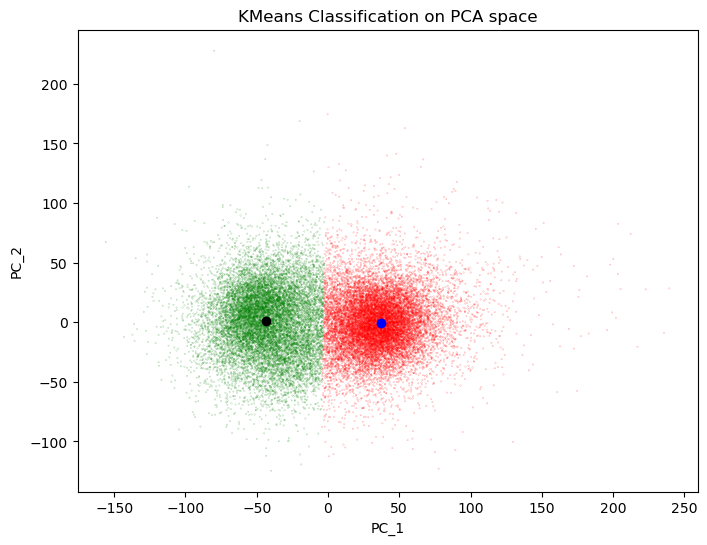

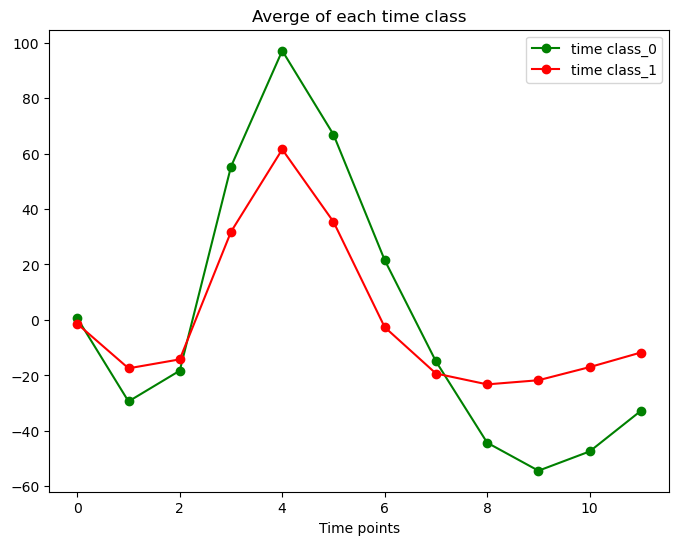

In [16]:
from sklearn.cluster import KMeans

# from https://www.udemy.com/course/statsml_x/learn/lecture/20246060#questions/12376674

# data from PCA
data = np.vstack((pcscores[:,0], pcscores[:,1])).T
 
# KMeans classification
k = 2
km = KMeans(n_clusters=k).fit(data)
# group labels
groupidx = km.predict(data)
cents = km.cluster_centers_
 
# generate color_map, and averges of each class based on KMeans classification
groupidx_color=[]
counter = 0
class_0 = 0
class_1 = 0
for i in range(len(groupidx)):
    if groupidx[i] == 0:
        groupidx_color.append('r')
        class_0 += spikes[i]
        counter+=1
    else:
        groupidx_color.append('g')
        class_1 += spikes[i]
 
#Normalize classes
class_0 = class_0 / counter
class_1 = class_1 / (len(groupidx) - counter)

plt.scatter(pcscores[:,0],pcscores[:,1],c=groupidx_color, s=0.01)
plt.plot(cents[:1,0],cents[:1,1],'bo')
plt.plot(cents[1:,0],cents[1:,1],'ko')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title('KMeans Classification on PCA space')
plt.show()
 
plt.plot(class_0,'go-', label = 'time class_0')
plt.plot(class_1,'ro-', label = 'time class_1')
plt.xlabel('Time points')
plt.title('Averge of each time class')
plt.legend()
plt.show()

In [21]:
testd = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(testd)

data = np.vstack((testd[:,0], testd[:,1])).T
print(data)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2]
 [4 5]
 [7 8]]
